# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/mcurban/Downloads/traffic-signs-data/train.p"
testing_file = "/Users/mcurban/Downloads/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

(39209,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

24


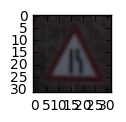

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(X_train))
image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

117627
117627
done with implementation


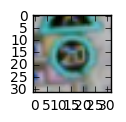

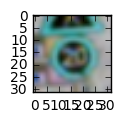

In [4]:
### Preprocess the data here.
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

from sklearn.utils import shuffle
import cv2
import numpy as np

more_data = np.zeros(shape=(X_train.shape[0]*3,X_train.shape[1],X_train.shape[2],3))
more_labels = np.zeros(y_train.shape[0]*3)
for i in range(0,len(X_train)):
    more_data[3*i] = X_train[i]
    kernel = np.ones((2,2),np.float32)/4
    more_data[3*i+1] = cv2.filter2D(X_train[i],-1,kernel)
    kernel2 = np.ones((3,3),np.float32)/9
    more_data[3*i+2] = cv2.filter2D(X_train[i],-1,kernel2)

    more_labels[3*i] = y_train[i]
    more_labels[3*i+1] = y_train[i]
    more_labels[3*i+2] = y_train[i]
    
plt.figure(figsize=(1,1))
plt.imshow(more_data[0])
plt.figure(figsize=(1,1))
plt.imshow(more_data[1])

print(len(more_data))
print(len(more_labels))

#X_train, y_train = shuffle(X_train, y_train)

from tensorflow.contrib.layers import flatten
mu = 0
sigma = 0.1
layer5_biases = tf.Variable(tf.constant(1.0, shape=[43]))
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.constant(1.0, shape=[84]))
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.constant(1.0, shape=[120]))
epsilon = 1e-3
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.constant(0.0, shape=[16]))
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.constant(0.0, shape=[6]))
scale1 = tf.Variable(tf.ones([120]))
offset1 = tf.Variable(tf.zeros([120]))
scale2 = tf.Variable(tf.ones([84]))
offset2 = tf.Variable(tf.zeros([84]))

def LeNet(x):    
    # Hyperparameters

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1   = tf.matmul(fc0, fc1_W)
    mean1, variance1 = tf.nn.moments(fc1,[0])
    
    fc1_normal = tf.nn.batch_normalization(fc1,mean1,variance1,offset1,scale1,epsilon)
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1_normal)
   # fc1 = tf.nn.dropout(fc1, 0.9)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2    = tf.matmul(fc1, fc2_W)
    mean2,variance2 = tf.nn.moments(fc2,[0])
    fc2_normal = tf.nn.batch_normalization(fc2,mean2,variance2,offset2,scale2,epsilon)
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2, 0.8)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.matmul(fc2, fc3_W) + layer5_biases
    
    return logits

print("done with implementation")

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I tried different methods of preprocessing to see what the outputs might be(more of a trial and error).
I began with changing the colors(bgr2hsv, bgr2gray) but the result were so bad that I abandoned the idea completetly.

Than I tried some normalization methods. The Local Response Normalization resulted in some dissapointing results,
but the batch_normalization gave me some promising results. I used it only on one layer.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=0.2,random_state=0)
print(X_train[0].shape)

(32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I tried different optimizers, but after some attempts(especially with the GradientDescent) 

I set up a validation set of 20%.
When I was running the training in early stages(after trying changing the colors and before batch_normalization)
I noticed that the accuracy was still growing, so I was curious to see what would happen if I had more data so I doubled initially every image. The results were great: I was able to grow from 85-86%(test) to around 90%. 
So I tried to work other type of additional data: Instead of just adding the same image, I tried at first with bgr2hsv which I expected after I saw what happened when I used that method for preprocessing. After that I added some blur on the second image, which gave a slight increase in accuracy(both validation and test sets)
After I added the batch_normalization I grew up to 92-93%.
In the end I ended up with tripling the data.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I decided to stay with the LeNet Architecture. I didn't modify the architecture because I had some good results with the modifications that I made. If I didn't have any success in improving my model, than I would have tried other architectures. I noticed that droput didn't help that much, so I assume that my network is too small. That one thing that I will try to do.
**Review: The reason why I didn't provide more details because I used the LeNet Architecture like in the LeNet Lab.

Architecture Layer 1: Convolutional. The output shape should be 28x28x6. Activation. I used relu activation Pooling. The output shape should be 14x14x6. 
Layer 2: Convolutional. The output shape should be 10x10x16. Activation. I used relu activation Pooling. The output shape should be 5x5x16. Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. Layer 3: Fully Connected. This should have 120 outputs. Activation. I used relu activation 
Layer 4: Fully Connected. This should have 84 outputs. Activation. I used relu activation 
Layer 5: Fully Connected (Logits). This should have 43 outputs

In [7]:
### Train your model here.

x = tf.placeholder(tf.float32, (None, 32, 32,3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(more_data)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(more_data, more_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, "/Users/mcurban/Downloads/traffic-signs-data/model.ckpt")
    print("Model saved")
    

### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ...
Validation Accuracy = 0.966

EPOCH 2 ...
Validation Accuracy = 0.987

EPOCH 3 ...
Validation Accuracy = 0.993

EPOCH 4 ...
Validation Accuracy = 0.995

EPOCH 5 ...
Validation Accuracy = 0.997

EPOCH 6 ...
Validation Accuracy = 0.996

EPOCH 7 ...
Validation Accuracy = 0.998

EPOCH 8 ...
Validation Accuracy = 0.998

EPOCH 9 ...
Validation Accuracy = 0.996

EPOCH 10 ...
Validation Accuracy = 0.997

EPOCH 11 ...
Validation Accuracy = 0.998

EPOCH 12 ...
Validation Accuracy = 0.999

EPOCH 13 ...
Validation Accuracy = 0.997

EPOCH 14 ...
Validation Accuracy = 0.999

EPOCH 15 ...
Validation Accuracy = 0.999

EPOCH 16 ...
Validation Accuracy = 0.998

EPOCH 17 ...
Validation Accuracy = 0.997

EPOCH 18 ...
Validation Accuracy = 0.999

EPOCH 19 ...
Validation Accuracy = 0.999

EPOCH 20 ...
Validation Accuracy = 0.999

Model saved


In [8]:
with tf.Session() as sess:
    saver.restore(sess,"/Users/mcurban/Downloads/traffic-signs-data/model.ckpt")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print(y_test)
    print(len(y_test))

Test Accuracy = 0.937
[16  1 38 ...,  6  7 10]
12630


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Here is where I described my usage of GradientDescent**
I tried different optimizers, but after some attempts(especially with the GradientDescent) I came back to where I started. Batch Size = 128 I had some good results with 64 but in general it was better with 128 epochs = 20 Before adding any additional data I used only 10, but after that I moved toward 20,30,40 finally deciding to 20.

**I mentioned above that my model would suffer from overfitting and I didn't want o repeat myself too much. That's why I tried dropout.**
Relu activation worked out the best for me. I tried with dropout but I didn't have much success.

**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

In most parts it was a process of trial and error based on the advices from the classroom(normalization,dropout etc) and hints from this notebook(adding data)
As I said before, my steps looked something like this(I might not remember everything exactly, because I tried a lot of different things):

1. I played around with the colors => no success
2. I modified the weights and biases => some success
3. I used different optimizers/learning rates => not much of a success. I came back to AdamOptimizer with 0.001 learning rate
4. I added more data => I saw a lot of improvement.
5. I tried LRN => I was dissapointed.
6. Seeing that I cannot figure it out the weights and biases for some big improvement I decided to use batch_normalization.
7. I tried to prevent overfitting using dropout but wasn't very useful, which means that I would have to modify my architecture a little bit.
8. I didn't know exactly how much data should I add, and the batch_size and epochs. I tried different combinations to find the optimum solution.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

predicted labels 1
predicted labels 13
predicted labels 17
predicted labels 11
predicted labels 14
Correct labels [7, 13, 17, 11, 14]


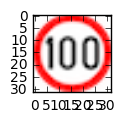

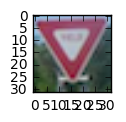

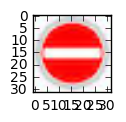

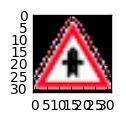

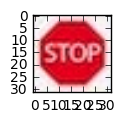

In [12]:
### Load the images and plot them here.

 # uses the Image module (PIL)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
test_imgs = np.uint8(np.zeros((5,32,32,3)))
%matplotlib inline
y_pred = [7,13,17,11,14]
def getImage(x):
    img = mpimg.imread('/Users/mcurban/Downloads/traffic-signs-data/{}.png' .format(x+1))
    img = (img * 255).round().astype(np.uint8)
    r, g, b= img[:,:,0], img[:,:,1], img[:,:,2]
    test_imgs[x][:,:,0] = r 
    test_imgs[x][:,:,1] = g
    test_imgs[x][:,:,2] = b
    plt.figure(figsize=(1,1))
    plt.imshow(test_imgs[x])
    
for i in range(0,5):
    getImage(i)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,"/Users/mcurban/Downloads/traffic-signs-data/model.ckpt")
    data_placeholder = tf.placeholder(tf.float32, [5,32, 32, 3])
    predictions = tf.nn.softmax(LeNet(data_placeholder))
    val = sess.run(predictions, feed_dict={data_placeholder: test_imgs})
    top_k = sess.run(tf.nn.top_k(val, 5, sorted=True))
    for i in range(0,5):
        print("predicted labels",top_k[1][i][0])
    print("Correct labels",y_pred)

### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I tested only 5 images. The speed limit signs are very similar between them, so that's why I choose one of them and my model failed in that case.
1. The speed limits are very similar between them(one red circle and a white circle, with 0's inside of it)
2. I also put a local US yield sign, because there was a little difference between the German and US one(there is a yield label on the US one).
3. I can't think of any reason why this sign might not be recognized. It is from another country, but I don't think there is any difference between them. Another thing with it is that is not taken from the street but from a book.
4. I also had some doubts about the right of way sign just because there are a lot warning signs like this
5. The same thing as at #3. This is a little bit blurry and has some text in the middle.

In [10]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
I got 80%. Probably I would need more images to get a more accurate percentage and see exactly where I am, but at first look I think my model did pretty well.
The yield sign is from USA actually. There is a small difference between the US sign and the german(the US has a "yield" label).

In [13]:
### Visualize the softmax probabilities here.

for i in range(0,5):
    print("\n\nimage:", i+1)
    print("probability:",top_k[0][i])
    print("indices:",top_k[1][i])
    found = 0
    for j in range(0,len(top_k[0][i])):
        if y_pred[i] == top_k[1][i][j]:
            print("\npredicted at number:",j)
            found =1
    if found == 0:
        print("\nnot found in top 5")


### Feel free to use as many code cells as needed.



image: 1
probability: [  9.99980211e-01   1.60366035e-05   2.84609541e-06   7.52354424e-07
   9.90307853e-08]
indices: [ 1  2  4  7 18]

predicted at number: 3


image: 2
probability: [  9.99543071e-01   4.53718501e-04   2.60008710e-06   2.74978134e-07
   1.96922670e-07]
indices: [13  6 38 10 34]

predicted at number: 0


image: 3
probability: [  1.00000000e+00   2.73990737e-13   4.82667698e-14   2.26613060e-14
   9.19937242e-15]
indices: [17  2 22 23 11]

predicted at number: 0


image: 4
probability: [  9.99665141e-01   1.89259081e-04   7.82311836e-05   6.09420822e-05
   3.25774022e-06]
indices: [11 26 40 30 12]

predicted at number: 0


image: 5
probability: [ 0.96222752  0.01065618  0.00920571  0.00571261  0.00522173]
indices: [14 29  7  3 25]

predicted at number: 0


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model is certain of all the images but the first one which is at number 4. Actually the model is certain that the image is 30 limit sign

The model is certain of all the images but the first one which is at number 4. Actually the model is certain that the image is 30 limit sign
** The softmax probabilities are printed above There are 3 lines:**
the number of the image
the top 5 predictions. they are sorted.
indices of those predictions
The code cell was placed before the question(I didn't move it, that's where it was from the beggining), so probably that's why you missed.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.